In [29]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Eowin2210/Estadistica-inferencial/refs/heads/main/smart_logistics_dataset.csv')
df.dropna(inplace=True)
df

,Timestamp,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,2024-10-30 07:53:51,Truck_6,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,2024-10-28 00:50:54,Truck_9,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,2024-09-28 09:08:23,Truck_9,46.5643,-126.5348,222,In Transit,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,2024-11-09 00:48:26,Truck_2,54.1683,-135.2676,389,In Transit,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,2024-02-02 22:28:16,Truck_10,-25.2768,156.1262,234,Delivered,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,2024-10-14 10:21:17,Truck_4,46.9729,-36.5198,420,Delayed,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,2024-06-13 00:29:04,Truck_1,44.2477,175.0702,143,Delivered,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,2024-07-22 16:30:00,Truck_6,89.8701,73.6867,264,Delivered,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,2024-04-30 04:58:58,Truck_5,-10.4792,-177.1239,479,Delivered,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


In [30]:
df.drop(columns = ['Timestamp'], inplace = True)
df

,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,Truck_6,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,Truck_9,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,Truck_9,46.5643,-126.5348,222,In Transit,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,Truck_2,54.1683,-135.2676,389,In Transit,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,Truck_10,-25.2768,156.1262,234,Delivered,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Truck_4,46.9729,-36.5198,420,Delayed,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,Truck_1,44.2477,175.0702,143,Delivered,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,Truck_6,89.8701,73.6867,264,Delivered,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,Truck_5,-10.4792,-177.1239,479,Delivered,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


In [31]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Waiting_Time ~ C(Asset_ID)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Asset_ID),9.0,1185.003921,131.667102,0.635796,0.766885
Residual,727.0,150554.551031,207.090166,NaN,NaN


In [32]:
df.drop(columns = ['Asset_ID'], inplace = True)
df

,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,46.5643,-126.5348,222,In Transit,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,54.1683,-135.2676,389,In Transit,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,-25.2768,156.1262,234,Delivered,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,Delayed,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,44.2477,175.0702,143,Delivered,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,89.8701,73.6867,264,Delivered,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,-10.4792,-177.1239,479,Delivered,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


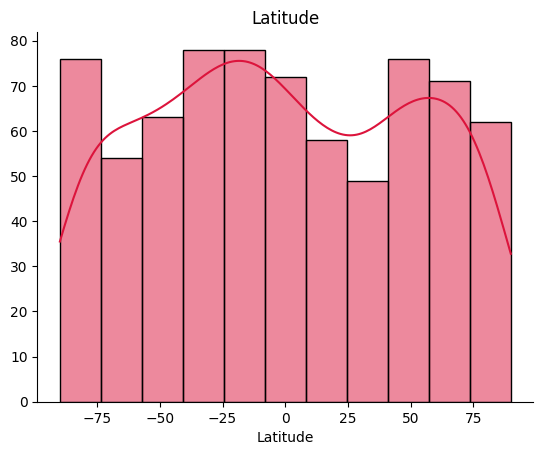

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Latitude'], kde = True, color = 'crimson')

plt.xlabel('Latitude')
plt.ylabel('')
plt.title('Latitude')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

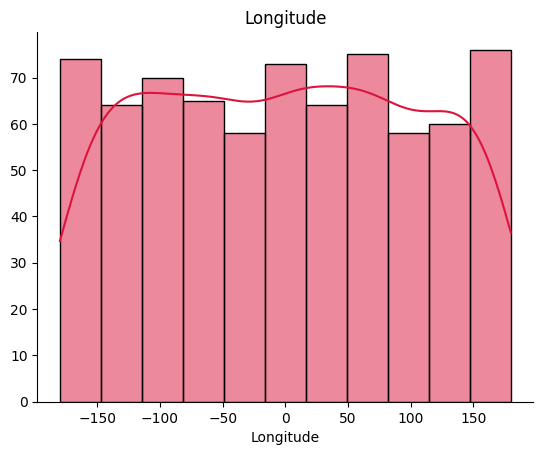

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Longitude'], kde = True, color = 'crimson')

plt.xlabel('Longitude')
plt.ylabel('')
plt.title('Longitude')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

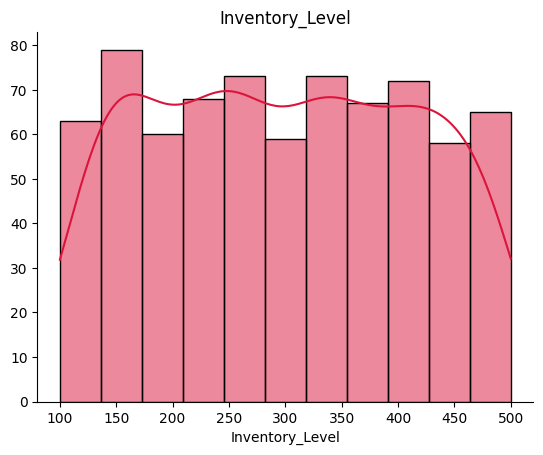

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Inventory_Level'], kde = True, color = 'crimson')

plt.xlabel('Inventory_Level')
plt.ylabel('')
plt.title('Inventory_Level')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Waiting_Time ~ C(Shipment_Status)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Shipment_Status),2.0,208.098709,104.049355,0.504002,0.604317
Residual,734.0,151531.456243,206.446126,NaN,NaN


In [37]:
df.drop(columns = ['Shipment_Status'], inplace = True)
df

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,22.2748,-131.7086,491,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,42.3900,-1.4788,330,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,46.5643,-126.5348,222,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,54.1683,-135.2676,389,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,-25.2768,156.1262,234,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,44.2477,175.0702,143,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,89.8701,73.6867,264,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,-10.4792,-177.1239,479,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


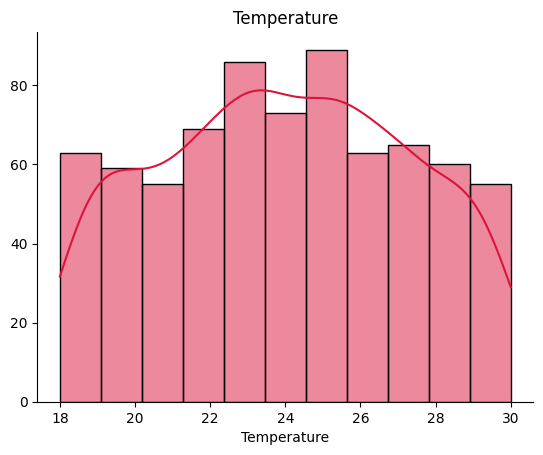

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Temperature'], kde = True, color = 'crimson')

plt.xlabel('Temperature')
plt.ylabel('')
plt.title('Temperature')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

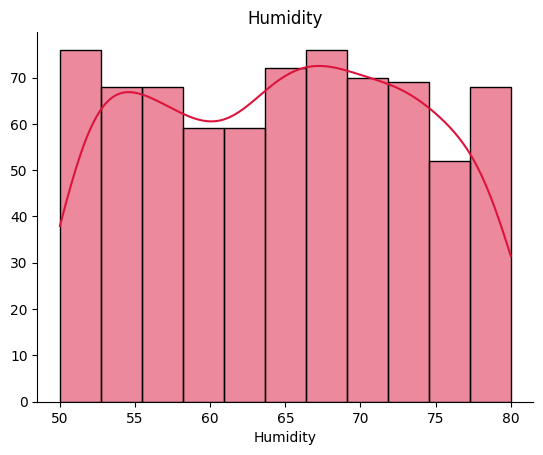

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Humidity'], kde = True, color = 'crimson')

plt.xlabel('Humidity')
plt.ylabel('')
plt.title('Humidity')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [40]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Waiting_Time ~ C(Traffic_Status)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Traffic_Status),2.0,168.452231,84.226116,0.407874,0.665213
Residual,734.0,151571.102721,206.500140,NaN,NaN


In [41]:
df.drop(columns = ['Traffic_Status'], inplace = True)
df

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,22.2748,-131.7086,491,22.5,54.3,16,439,7,Weather,80.9,174,1
3,42.3900,-1.4788,330,25.4,52.3,37,227,5,Traffic,97.4,160,1
7,46.5643,-126.5348,222,23.3,64.2,30,459,9,Traffic,73.8,253,0
9,54.1683,-135.2676,389,21.9,57.3,52,127,7,Mechanical Failure,63.1,224,0
11,-25.2768,156.1262,234,29.7,63.6,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,21.6,62.8,31,242,10,Weather,95.6,221,1
994,44.2477,175.0702,143,21.6,64.1,32,307,10,Traffic,64.0,168,0
995,89.8701,73.6867,264,26.9,70.0,32,188,1,Weather,79.2,213,1
996,-10.4792,-177.1239,479,23.7,77.9,56,276,7,Weather,83.7,272,0


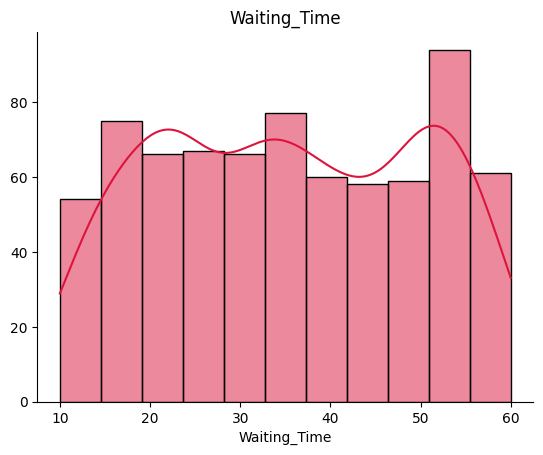

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Waiting_Time'], kde = True, color = 'crimson')

plt.xlabel('Waiting_Time')
plt.ylabel('')
plt.title('Waiting_Time')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

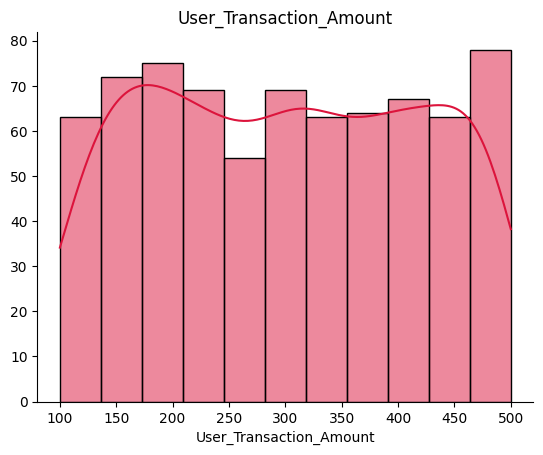

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['User_Transaction_Amount'], kde = True, color = 'crimson')

plt.xlabel('User_Transaction_Amount')
plt.ylabel('')
plt.title('User_Transaction_Amount')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

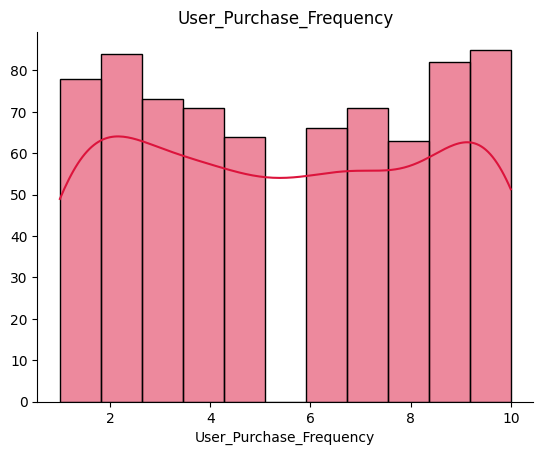

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['User_Purchase_Frequency'], kde = True, color = 'crimson')

plt.xlabel('User_Purchase_Frequency')
plt.ylabel('')
plt.title('User_Purchase_Frequency')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [45]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Waiting_Time ~ C(Logistics_Delay_Reason)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Logistics_Delay_Reason),2.0,430.598291,215.299145,1.044417,0.352419
Residual,734.0,151308.956662,206.142993,NaN,NaN


In [46]:
df.drop(columns = ['Logistics_Delay_Reason'], inplace = True)
df

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,22.2748,-131.7086,491,22.5,54.3,16,439,7,80.9,174,1
3,42.3900,-1.4788,330,25.4,52.3,37,227,5,97.4,160,1
7,46.5643,-126.5348,222,23.3,64.2,30,459,9,73.8,253,0
9,54.1683,-135.2676,389,21.9,57.3,52,127,7,63.1,224,0
11,-25.2768,156.1262,234,29.7,63.6,13,406,10,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,21.6,62.8,31,242,10,95.6,221,1
994,44.2477,175.0702,143,21.6,64.1,32,307,10,64.0,168,0
995,89.8701,73.6867,264,26.9,70.0,32,188,1,79.2,213,1
996,-10.4792,-177.1239,479,23.7,77.9,56,276,7,83.7,272,0


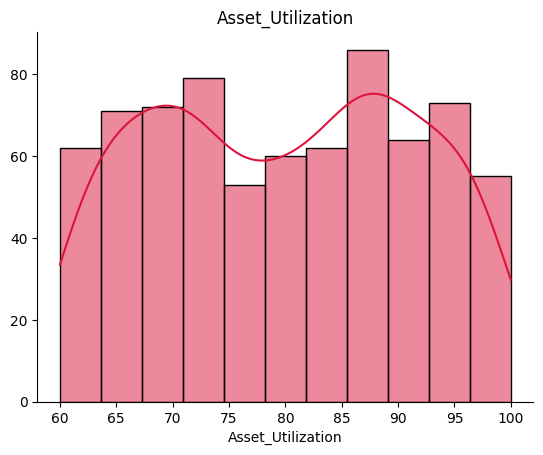

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Asset_Utilization'], kde = True, color = 'crimson')

plt.xlabel('Asset_Utilization')
plt.ylabel('')
plt.title('Asset_Utilization')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

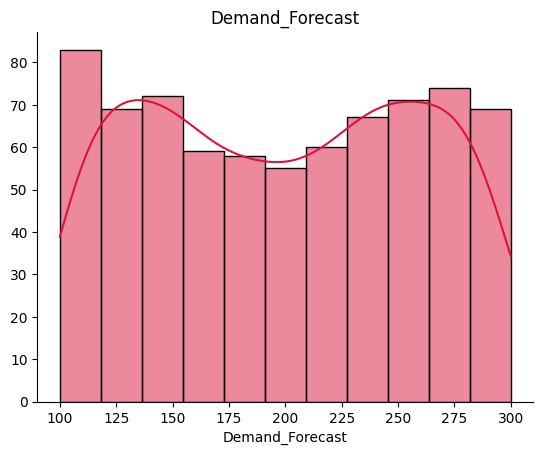

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Demand_Forecast'], kde = True, color = 'crimson')

plt.xlabel('Demand_Forecast')
plt.ylabel('')
plt.title('Demand_Forecast')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [49]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Waiting_Time ~ C(Logistics_Delay)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Logistics_Delay),1.0,532.543800,532.543800,2.588635,0.108062
Residual,735.0,151207.011153,205.723825,NaN,NaN


In [50]:
df.drop(columns = ['Logistics_Delay'], inplace = True)
df

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Asset_Utilization,Demand_Forecast
1,22.2748,-131.7086,491,22.5,54.3,16,439,7,80.9,174
3,42.3900,-1.4788,330,25.4,52.3,37,227,5,97.4,160
7,46.5643,-126.5348,222,23.3,64.2,30,459,9,73.8,253
9,54.1683,-135.2676,389,21.9,57.3,52,127,7,63.1,224
11,-25.2768,156.1262,234,29.7,63.6,13,406,10,85.5,238
...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,21.6,62.8,31,242,10,95.6,221
994,44.2477,175.0702,143,21.6,64.1,32,307,10,64.0,168
995,89.8701,73.6867,264,26.9,70.0,32,188,1,79.2,213
996,-10.4792,-177.1239,479,23.7,77.9,56,276,7,83.7,272


Text(0.5, 1.0, 'Matriz De Correlacion')

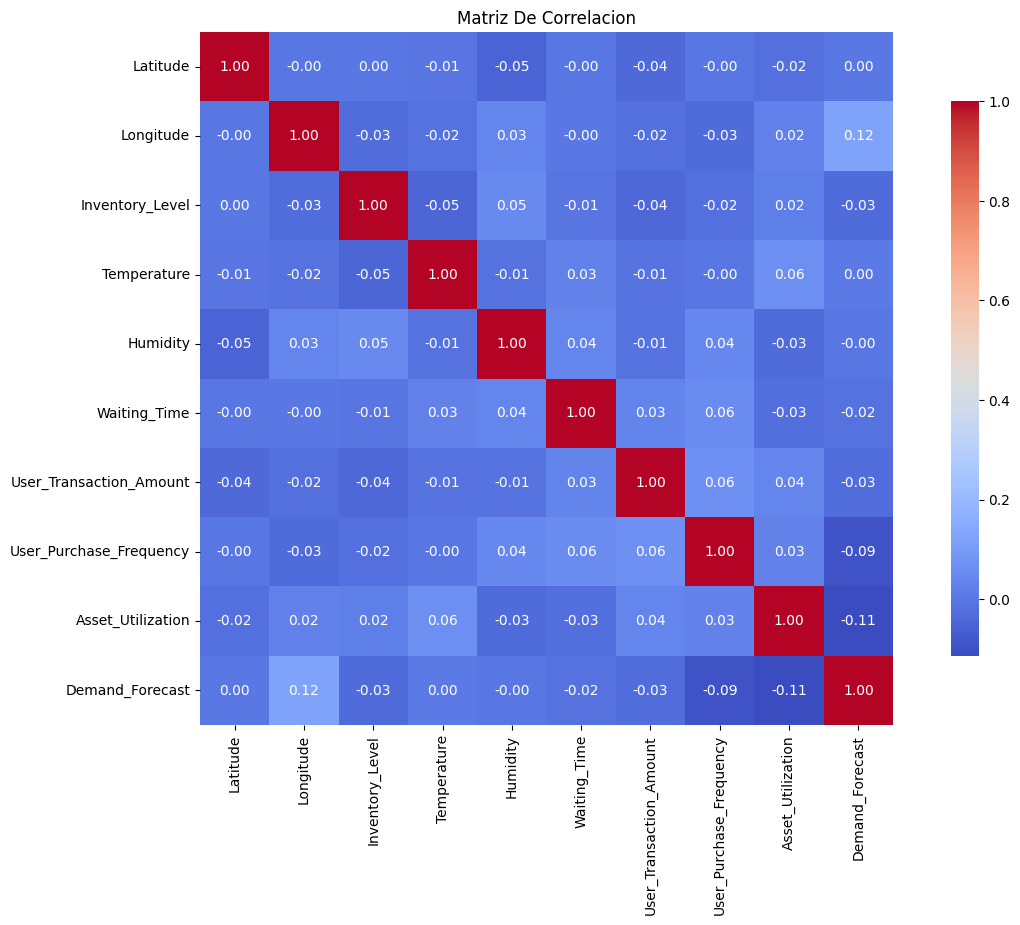

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
matriz_de_correlacion = df.corr()
plt.figure(figsize = (15,9))
sns.heatmap(matriz_de_correlacion, annot = True, cmap = 'coolwarm', fmt = '0.2f', square = True, cbar_kws = {'shrink': 0.8})
plt.title('Matriz De Correlacion')

Coeficiente de determinacion: -0.0212


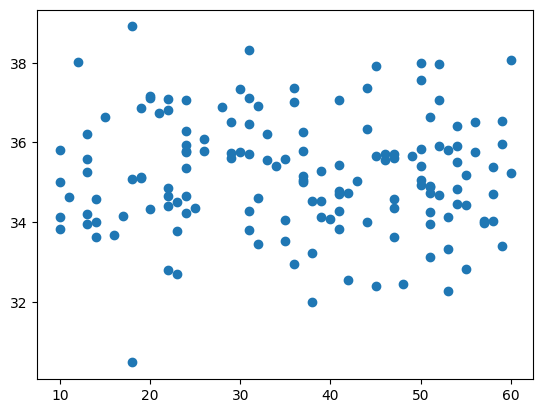

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = df[['Latitude','Longitude', 'Inventory_Level', 'Temperature', 'Humidity', 'User_Transaction_Amount', 'User_Purchase_Frequency', 'Asset_Utilization', 'Demand_Forecast']]
Y = df['Waiting_Time']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

X_train_constante = sm.add_constant(X_train)
X_test_constante = sm.add_constant(X_test)

modelo = sm.OLS(Y_train, X_train_constante).fit()

Yc = modelo.predict(X_test_constante)

plt.scatter(Y_test, Yc)

r2 = r2_score(Y_test, Yc)
print(f'Coeficiente de determinacion: {r2: 0.4f}')


In [ ]:
from statsmodels.formula.api import ols

moedo_2 = ols(formula = 'Waiting_Time ~ Latitude + Longitude + Inventory_Level + Temperature + Humidity + User_Transaction_Amount + User_Purchase_Frequency + Asset_Utilization + Demand_Forecast', data = df).fit()
tabla_anova = sm.stats.anova_lm(moedo_2, typ = 2)
tabla_anova
 #La hipotesis nula se acepta ya que ninguna de las variables cuenta con una relacion con la variable dependiente

,sum_sq,df,F,PR(>F)
Latitude,0.340250,1.0,0.001642,0.967692
Longitude,2.348536,1.0,0.011331,0.915256
Inventory_Level,1.151585,1.0,0.005556,0.940601
Temperature,140.969097,1.0,0.680150,0.409806
Humidity,156.110361,1.0,0.753204,0.385750
User_Transaction_Amount,149.284976,1.0,0.720272,0.396334
User_Purchase_Frequency,391.509323,1.0,1.888960,0.169743
Asset_Utilization,148.570259,1.0,0.716824,0.397466
Demand_Forecast,35.287876,1.0,0.170257,0.680005
Residual,150679.347183,727.0,NaN,NaN


In [ ]:
b0, b1, b2, b3, b4, b5, b6, b7, b8, b9 = modelo.params

Fun = lambda X1, X2, X3, X4, X5, X6, X7, X8, X9 : b0 + b1 * X1 + b2 * X2 + b3 * X3 + b4 * X4 + b5 * X5 + b6 * X6 + b7 * X7 + b8 * X8 +b9 * X9

#Un cliente quiere saber cuantos minutos aproximadamente pasara a proceso tomando en cuenta la informacion que le proporciona 
##la empresa de su paquete , estima los minutos a tardar en procesarse su paquete

Fun(45.12, 176.0, 221, 28, 57.3, 126, 6, 62.1, 223)

35.782871976247094